In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from sklearn.linear_model import (LinearRegression, LassoCV, RidgeCV, Lasso, Ridge )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer)
from sklearn.metrics import (mean_squared_error, r2_score)
from sklearn.linear_model import (ElasticNet, ElasticNetCV)

## 1. Загрузить данные day.csv

In [44]:
# url = 'https://archive.ics.uci.edu/ml/datasets/Bike%20Sharing%20Dataset'
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 2.Сделать предварительный анализ данных: шкалы измерения, типы данных, корреляцию и т.п.

In [45]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [46]:
bike.info()
# Пустых значений нет
# Все данные числовые, кроме столбца (dteday)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


<AxesSubplot:>

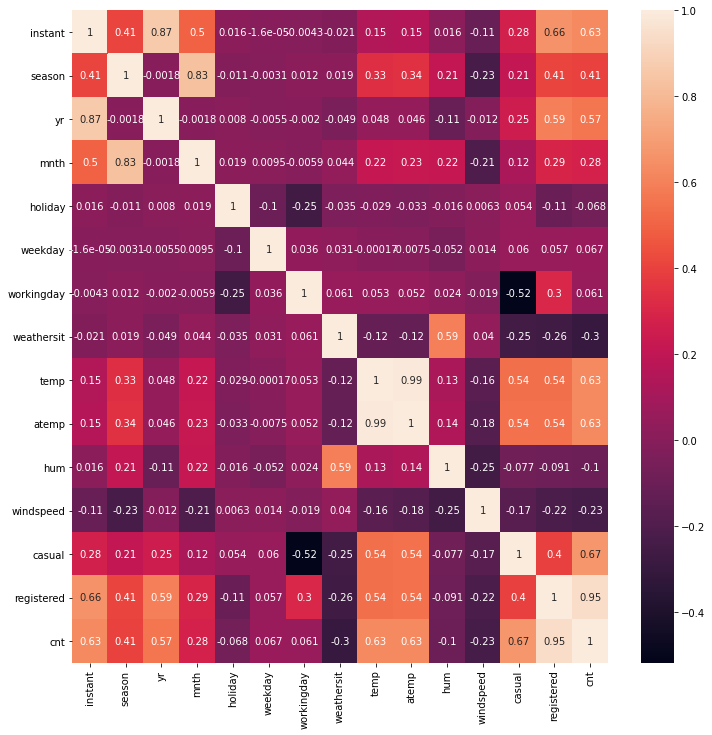

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(bike.corr(), annot=True, fmt='.2g', ax=ax)

## 3. Визуализировать данные

<AxesSubplot:xlabel='season', ylabel='cnt'>

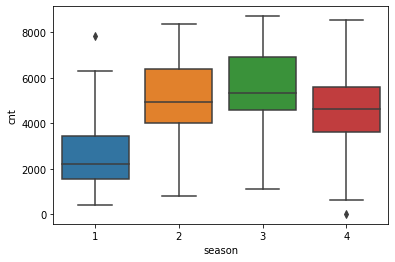

In [48]:
sns.boxplot(x='season', y='cnt', data=bike)

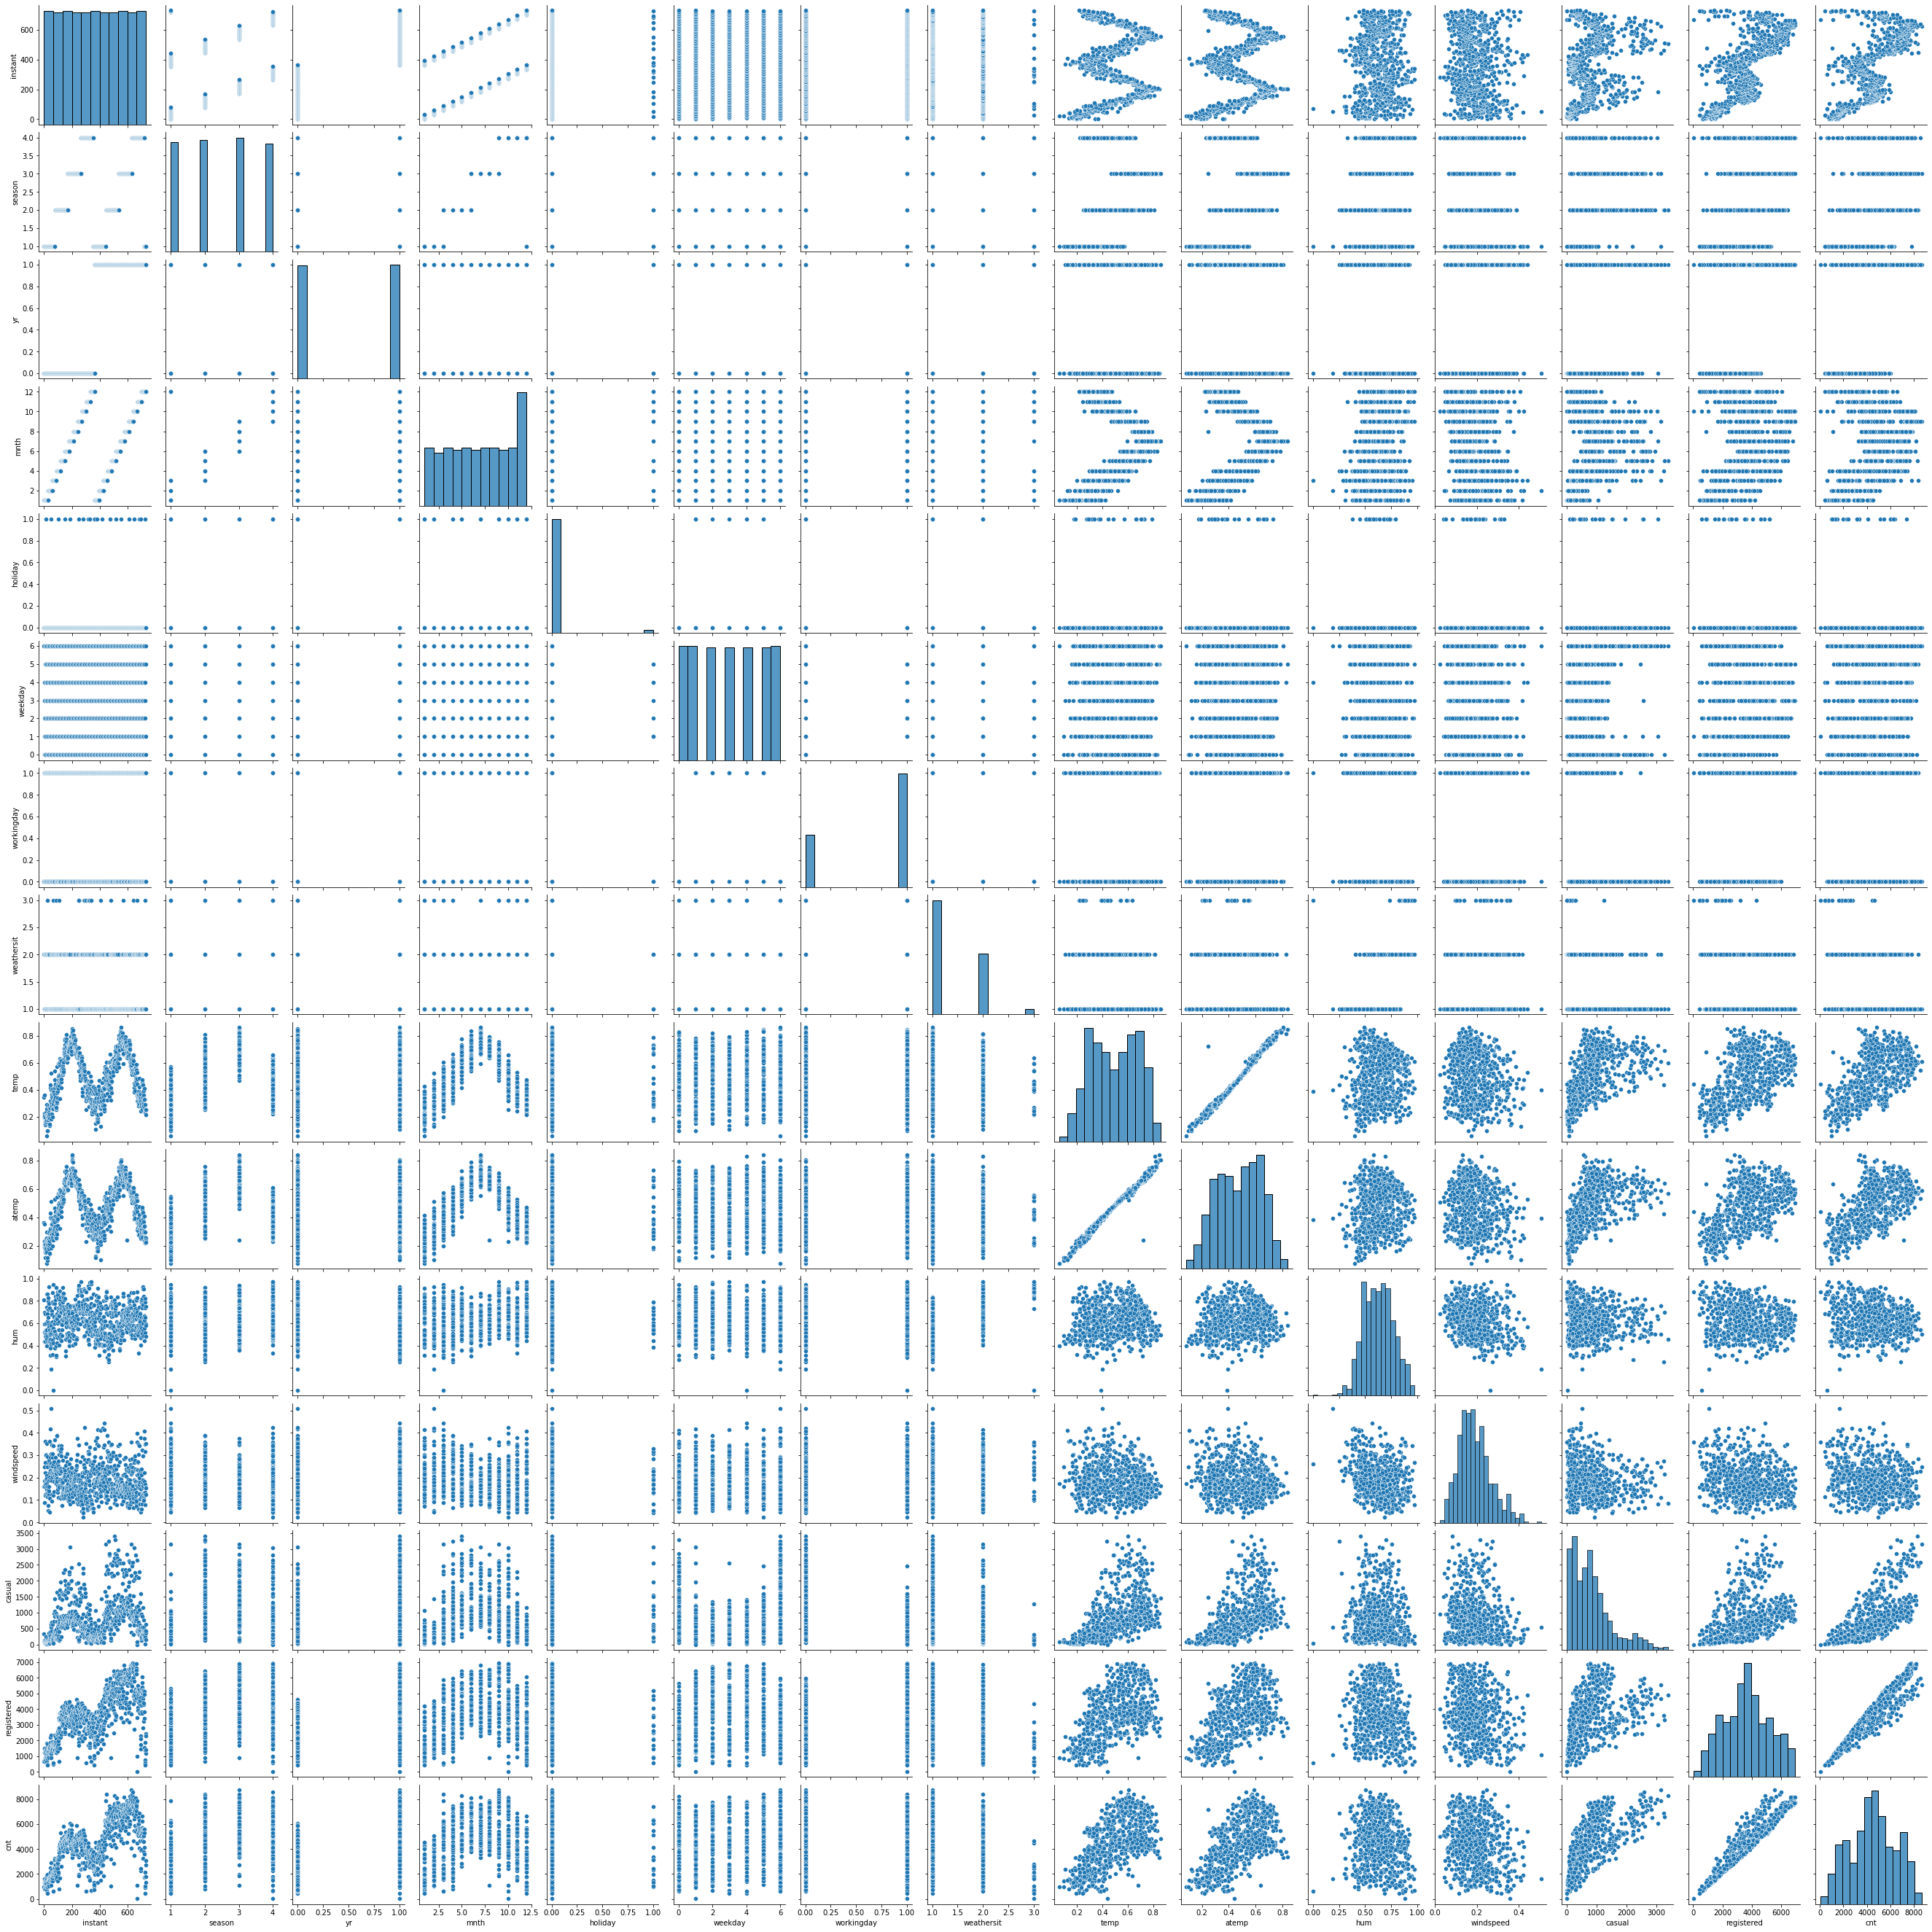

In [23]:
sns.pairplot(data=bike)

## 4. X – все кроме cnt, y - cnt

In [49]:
np.all(bike.casual + bike.registered == bike.cnt)

True

### Убираем признаки 'casual' и 'registered' так как их сумма дает 'cnt' 

In [145]:
# Дополнительно исключим столбец dteday
# т.к. вся необходимая информация из него
# содержится в других столбцах
X = bike.drop(['dteday', 'instant', 'registered', 'cnt'], axis=1).copy()
y = bike.cnt.copy()

In [146]:
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


## 5. Разбить выборку в соотношении 70 на 30 (%) 

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
X_train.shape, X_test.shape

((511, 12), (220, 12))

## 6. Провести стандартизацию X

In [149]:
## Масштабирование
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [199]:
pd.DataFrame(X_train_scaled, columns=X.columns)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,0.448135,-1.037900,0.436159,-0.167836,1.001385,0.734273,-0.733736,1.144306,1.076689,-1.553478,-0.842947,0.238458
1,1.353262,0.963484,1.307907,-0.167836,0.515894,0.734273,1.095235,-0.992647,-0.967094,-0.094050,-0.481189,-0.799868
2,1.353262,0.963484,1.307907,-0.167836,1.001385,0.734273,-0.733736,-0.863694,-0.826240,-0.774923,-0.242741,-0.566919
3,-0.456992,-1.037900,-0.145007,-0.167836,-0.940579,0.734273,-0.733736,0.739023,0.751792,-0.988064,1.532933,-0.028581
4,-1.362118,0.963484,-1.597921,-0.167836,-0.940579,0.734273,-0.733736,-1.282794,-1.350777,-1.654131,0.349045,-1.075429
...,...,...,...,...,...,...,...,...,...,...,...,...
506,-1.362118,-1.037900,-1.016756,-0.167836,-1.426070,-1.361892,-0.733736,-0.646233,-0.622284,-0.754973,1.073617,0.140449
507,-0.456992,-1.037900,-0.726173,-0.167836,-1.426070,-1.361892,-0.733736,-0.246554,-0.215419,-1.094635,1.508424,0.958610
508,1.353262,-1.037900,0.726741,-0.167836,0.030403,0.734273,1.095235,0.739023,0.587471,1.528190,-0.538798,-0.572601
509,-1.362118,0.963484,-1.016756,-0.167836,-1.426070,-1.361892,-0.733736,-0.771184,-0.748930,-1.113292,0.438870,1.100652


## 7. Написать функцию обучения модели и вывода RMSE, coef, R^2

In [150]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(((y_pred - y_true) ** 2).mean())

In [151]:
def train_validate_report(model, X_train, X_test, y_train, y_test, feature_names, X_scaled:bool,
                          model_name=None, verbose=True):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    coefs = {'intercept': l.intercept_, **dict(zip(feature_names, model.coef_))}
    coefs_df = pd.DataFrame.from_dict({'value': coefs})
    
    if verbose:
        if model_name:
            if X_scaled: model_name += '(scaled)'
            print(f'##### {model_name} ####')
        print(f'RMSE = {rmse}')
        print(f'R^2 = {r2}')
        print(coefs_df)
        print()
    
    return rmse, r2, coefs, model
    
    
    

In [233]:
def train_validate_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    coefs = pd.DataFrame(np.append(model.intercept_, model.coef_).reshape(1, -1), 
                         columns=np.append('intercept_', np.array(X.columns)))
    #coefs = {'intercept': l.intercept_, **dict(zip(feature_names, model.coef_))}
    
    print("Model:", model)
    print("\tRMSE:", rmse)
    print("\tR^2:", r2)
    display(coefs)
#     if verbose:
#         if model_name:
#             if X_scaled: model_name += '(scaled)'
#             print(f'##### {model_name} ####')
#         print(f'RMSE = {rmse}')
#         print(f'R^2 = {r2}')
#         print(coefs_df)
#         print()
    
#     return rmse, r2, coefs, model

In [163]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [164]:
y_pred = linreg.predict(X_test)

In [235]:
train_validate_report(linreg, X_train, X_test, y_train, y_test)

Model: LinearRegression()
	RMSE: 654.8156896131419
	R^2: 0.8922374357858405


,intercept_,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,157.467214,434.998297,1568.70454,-23.41259,31.140085,27.000338,1436.171858,-406.705657,-570.1584,3105.258157,-292.898385,-789.399549,1.510636
